# Step 1| Import Libraries

In [1]:
# 1. to handel the data
import pandas as pd
import numpy as np
# 2. To Viusalize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from scipy.stats import boxcox

# 3. To preprocess the data
from sklearn.preprocessing import StandardScaler

# 4. Machine Learning
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
# 5. For Classification task.
from sklearn.neighbors import KNeighborsClassifier
# 6. Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# 7. Save Model
import pickle
# 8. Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Step 2 | Read Dataset

In [2]:
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")
# print the first 5 rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Step 3 | Dataset Overview & Preparation
## Step 3.1 | Rename Variables

In [3]:
# Renamed name of variables to have a better understanding while working on dataset:
df.rename(columns={
    "age":"Age",
    "sex":"Sex",
    "cp":"ChestPain",
    "trestbps":"RestingBloodPressure",
    "chol":"Cholesterol",
    "fbs":"FastingBloodSugar",
    "restecg":"RestingECG",
    "thalach":"MaxHeartRate",
    "exang":"ExcerciseAngina",
    "oldpeak":"OldPeak",
    "slope":"STSlope",
    "ca":"nMajorVessels",
    "thal":"Thalium",
    "target":"Status"
}, inplace=True)
#Changed the integer values of some variables to categorical values based on description of variables:
mappings = {
    'Sex': {
        0: "Female",
        1: "Male"
    },
    'ChestPain': {
        0: "Typical angina",
        1: "Atypical angina",
        2: "Non-anginal pain",
        3: "Asymptomatic"
    },
    "FastingBloodSugar": {
        0:False,
        1:True
    },
    "RestingECG": {
        0:"Normal",
        1:"Abnormality",
        2:"Hypertrophy"
    },
    "ExcerciseAngina": {
        0:"No",
        1:"Yes"
    },
    "STSlope": {
        0:"Upsloping",
        1:"Flat",
        2:"Downsloping"
    },
    "Thalium": {
        0:"Normal",
        1:"Fixed defect",
        2:"Reversible defect",
        3:"Not described"
    },
    "Status": {
        0:"No Disease",
        1:"Heart Disease"
    }
}
def map_values(x, mapping):
    return mapping.get(x, x)
df_copy = df.copy()
for feature, mapping in mappings.items():
    df_copy[feature] = df_copy[feature].map(lambda x: map_values(x, mapping))
    df_copy[feature] = df_copy[feature].astype(object)
print("_" * 100)
df_copy.head()

____________________________________________________________________________________________________


,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Upsloping,0,Fixed defect,Heart Disease
1,37,Male,Non-anginal pain,130,250,False,Abnormality,187,No,3.5,Upsloping,0,Reversible defect,Heart Disease
2,41,Female,Atypical angina,130,204,False,Normal,172,No,1.4,Downsloping,0,Reversible defect,Heart Disease
3,56,Male,Atypical angina,120,236,False,Abnormality,178,No,0.8,Downsloping,0,Reversible defect,Heart Disease
4,57,Female,Typical angina,120,354,False,Abnormality,163,Yes,0.6,Downsloping,0,Reversible defect,Heart Disease


## Step 3.2 | Basic Information


In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   303 non-null    int64  
 1   Sex                   303 non-null    object 
 2   ChestPain             303 non-null    object 
 3   RestingBloodPressure  303 non-null    int64  
 4   Cholesterol           303 non-null    int64  
 5   FastingBloodSugar     303 non-null    object 
 6   RestingECG            303 non-null    object 
 7   MaxHeartRate          303 non-null    int64  
 8   ExcerciseAngina       303 non-null    object 
 9   OldPeak               303 non-null    float64
 10  STSlope               303 non-null    object 
 11  nMajorVessels         303 non-null    int64  
 12  Thalium               303 non-null    object 
 13  Status                303 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 33.3+ KB


In [5]:
df_copy.shape

(303, 14)

## Step 3.3 | Statistical Summary

In [6]:
stats_heart_df = df_copy.copy()
# Statistical summary of *********** Numerical Features ************
print("_" * 100)
print("*********** Numerical Features ************")
print(stats_heart_df.describe().T)
# Statistical summary of *********** Categorical Features ************
print("_" * 100)
print("*********** Categorical Features ************")
print(stats_heart_df.describe(include="object").T)

____________________________________________________________________________________________________
*********** Numerical Features ************
                      count        mean        std    min    25%    50%  \
Age                   303.0   54.366337   9.082101   29.0   47.5   55.0   
RestingBloodPressure  303.0  131.623762  17.538143   94.0  120.0  130.0   
Cholesterol           303.0  246.264026  51.830751  126.0  211.0  240.0   
MaxHeartRate          303.0  149.646865  22.905161   71.0  133.5  153.0   
OldPeak               303.0    1.039604   1.161075    0.0    0.0    0.8   
nMajorVessels         303.0    0.729373   1.022606    0.0    0.0    0.0   

                        75%    max  
Age                    61.0   77.0  
RestingBloodPressure  140.0  200.0  
Cholesterol           274.5  564.0  
MaxHeartRate          166.0  202.0  
OldPeak                 1.6    6.2  
nMajorVessels           1.0    4.0  
______________________________________________________________________

# Step 4 | Exploratary Data Analysis (EDA)

In [7]:
heart_df_eda = df_copy.copy()
def box_hist_plot(feature):
    plt.rcParams['axes.facecolor'] = '#D6F3FF'

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

    sns.histplot(heart_df_eda[feature], kde=True, color='#45b1e8', ax=axes[0])

    mean_value = heart_df_eda[feature].mean()
    median_value = heart_df_eda[feature].median()
    mode_value = heart_df_eda[feature].mode().values[0] 
    std_value = heart_df_eda[feature].std()
    min_value = heart_df_eda[feature].min()
    max_value = heart_df_eda[feature].max()

    axes[0].axvline(mean_value, color='b', linestyle='-', linewidth=2, label=f'Mean: {mean_value:.2f}')
    axes[0].axvline(median_value, color='r', linestyle='-', linewidth=2, label=f'Median: {median_value:.2f}')
    axes[0].axvline(mode_value, color='m', linestyle='-', linewidth=2, label=f'Mode: {mode_value:.2f}')
    axes[0].axvline(mean_value + std_value, color='b', linestyle='dashed', linewidth=2, label=f'Std +: {std_value:.2f}')
    axes[0].axvline(mean_value - std_value, color='b', linestyle='dashed', linewidth=2, label=f'Std -: {std_value:.2f}')
    axes[0].axvline(min_value, color='orange', linestyle='--', linewidth=2, label=f'Min: {min_value:.2f}')
    axes[0].axvline(max_value, color='orange', linestyle='--', linewidth=2, label=f'Max: {max_value:.2f}')

    axes[0].set_title(f"Histogram")
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel("Density")
    axes[0].legend()

    sns.boxplot(x=heart_df_eda[feature], ax=axes[1], color='#45b1e8')
    axes[1].axvline(mean_value, color='b', linestyle='-', linewidth=2)
    axes[1].axvline(median_value, color='r', linestyle='-', linewidth=2)
    axes[1].axvline(mode_value, color='m', linestyle='-', linewidth=2)
    axes[1].axvline(mean_value + std_value, color='b', linestyle='dashed', linewidth=2)
    axes[1].axvline(mean_value - std_value, color='b', linestyle='dashed', linewidth=2)
    axes[1].axvline(min_value, color='orange', linestyle='--', linewidth=2)
    axes[1].axvline(max_value, color='orange', linestyle='--', linewidth=2)
    axes[1].set_title("Box Plot")
    axes[1].set_xlabel(feature)

    plt.tight_layout()
    plt.title(f"{feature} Histogram and Box Plot")
    plt.savefig(f'./{feature}_hist_boxplot.png')
    plt.show()

# find outliers using IQR method
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_condition = (data < lower_bound) | (data > upper_bound)
    outliers = data[outlier_condition]
    
    return outliers, lower_bound, upper_bound
outliers = {}

## Step 4.1 | Univariate Analysis

In [8]:
def skewness_dist(df, variable):
    skewness = df[variable].skew()

    print(f"Skewness of the {variable} variable: {skewness:.3f}")

    if skewness > 0:
        print("The distribution is right-skewed.")
    elif skewness < 0:
        print("The distribution is left-skewed.")
    else:
        print("The distribution is approximately symmetric.")
def bar_donut_chart(variable):
    colors = ['#6CB4EE', '#318CE7', '#6495ED', '#87CEFA'] 

    category_counts = heart_df_eda[variable].value_counts()

    fig, axs = plt.subplots(1, 2, figsize=(14, 4)) 

    bars = axs[0].barh(category_counts.index, category_counts.values, color=colors)
    axs[0].set_title(f'{variable} Distribution', fontsize=16)
    axs[0].set_xlabel('Count')
    axs[0].set_ylabel(f'{variable} Types')

    for bar, value in zip(bars, category_counts.values):
        width = bar.get_width()
        axs[0].text(width, bar.get_y() + bar.get_height() / 2, '%d' % int(width),
                    ha='left', va='center', color='black', fontsize=10)

    status_counts = heart_df_eda[variable].value_counts()

    wedges, texts, autotexts = axs[1].pie(status_counts, labels=status_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)

    centre_circle = plt.Circle((0,0),0.70,fc='white')
    plt.gca().add_artist(centre_circle)

    axs[1].axis('equal')

    plt.tight_layout()
    plt.title(f'{variable} Bar and Donut Chart')
    plt.savefig(f'./{variable}_donut_chart.png')
    plt.show()

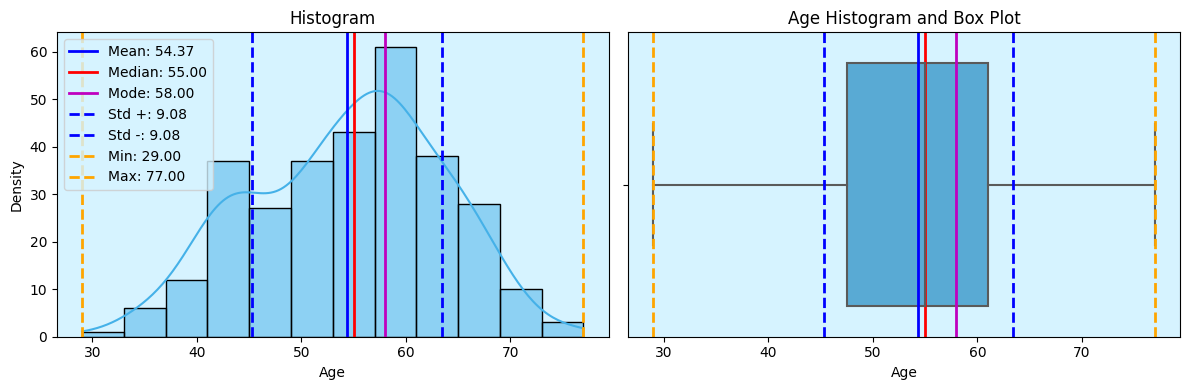

____________________________________________________________________________________________________
Skewness of the Age variable: -0.202
The distribution is left-skewed.
Lower Bound: 27.25
Upper Bound: 81.25
Outliers: 0


In [9]:
# Feature: Age
box_hist_plot("Age")
print("_" * 100)
skewness_dist(heart_df_eda, "Age")
#Outliers of Age variable
age_outliers, age_lower_bound, age_upper_bound = find_outliers(heart_df_eda['Age'])
print("Lower Bound:", age_lower_bound)
print("Upper Bound:", age_upper_bound)
print("Outliers:", len(age_outliers))
outliers.update({"Age":len(age_outliers)})
#There are no outliers in Age variable.

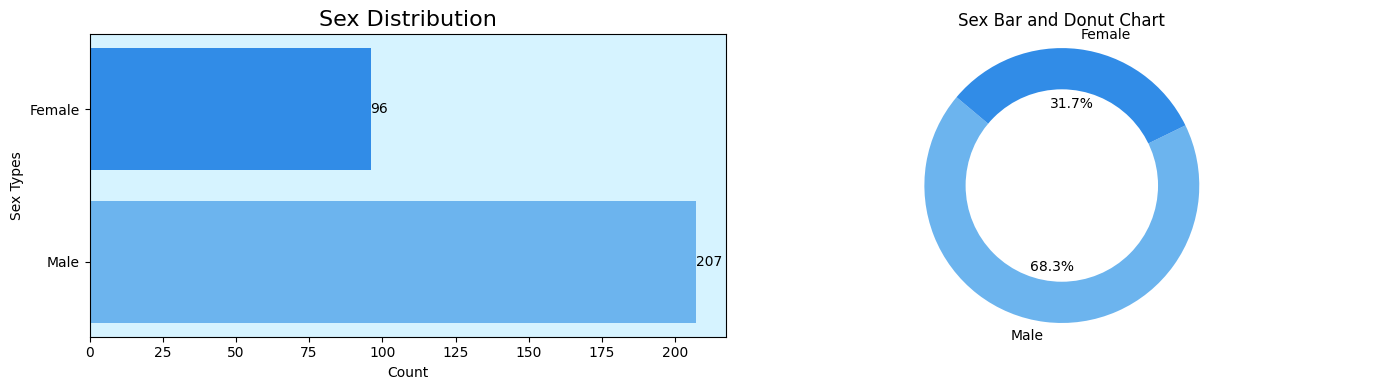

In [10]:
# Feature: Sex
bar_donut_chart("Sex")

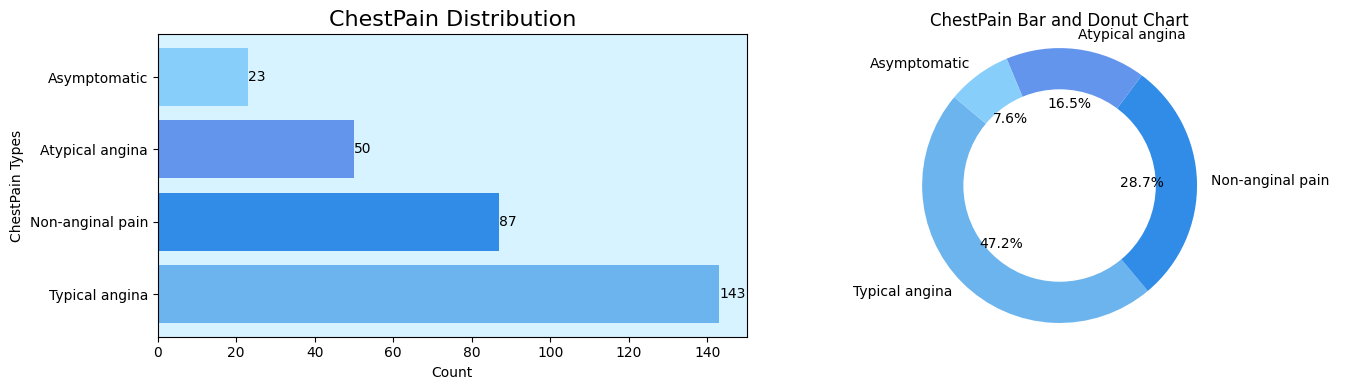

In [11]:
# Feature: ChestPain
bar_donut_chart("ChestPain")

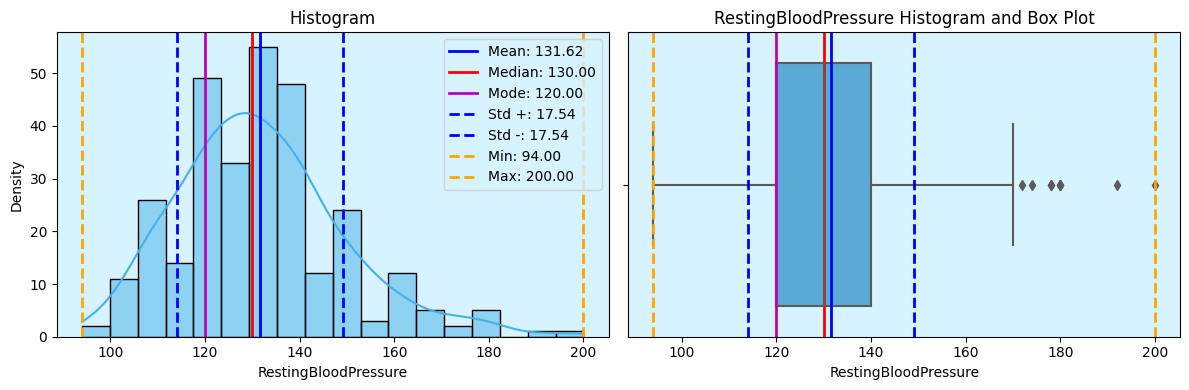

____________________________________________________________________________________________________
Skewness of the RestingBloodPressure variable: 0.714
The distribution is right-skewed.
Lower Bound: 90.0
Upper Bound: 170.0
Outliers: 9


In [12]:
# Feature: RestingBloodPressure
box_hist_plot("RestingBloodPressure")
print("_" * 100)
skewness_dist(heart_df_eda, "RestingBloodPressure")
#Outliers of Resting Blood Pressure column:
rbp_outliers, rbp_lower_bound, rbp_upper_bound = find_outliers(heart_df_eda['RestingBloodPressure'])
print("Lower Bound:", rbp_lower_bound)
print("Upper Bound:", rbp_upper_bound)
print("Outliers:", len(rbp_outliers))
outliers.update({"RestingBloodPressure":len(rbp_outliers)})

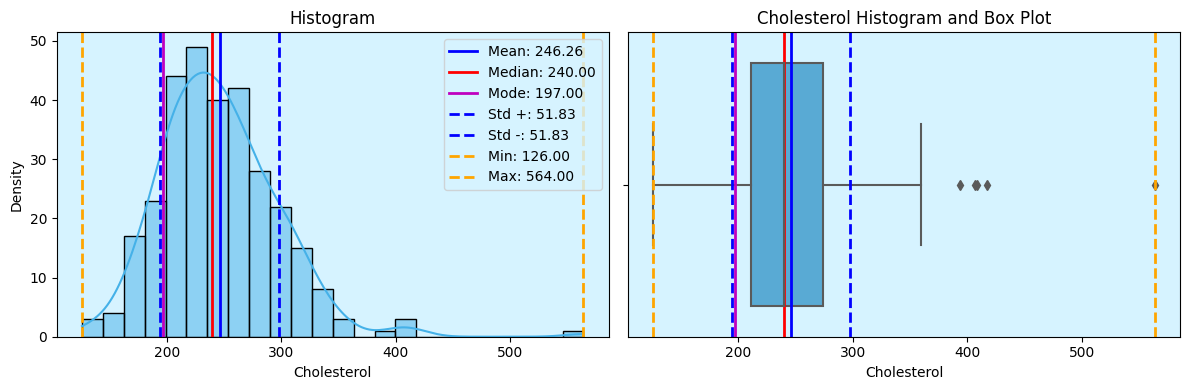

____________________________________________________________________________________________________
Skewness of the Cholesterol variable: 1.143
The distribution is right-skewed.
Lower Bound: 115.75
Upper Bound: 369.75
Outliers: 5


In [13]:
# Feature: Cholesterol
box_hist_plot("Cholesterol")
print("_" * 100)
skewness_dist(heart_df_eda, "Cholesterol")
ch_outliers, ch_lower_bound, ch_upper_bound = find_outliers(heart_df_eda['Cholesterol'])
print("Lower Bound:", ch_lower_bound)
print("Upper Bound:", ch_upper_bound)
print("Outliers:", len(ch_outliers))
outliers.update({"Cholesterol":len(ch_outliers)})

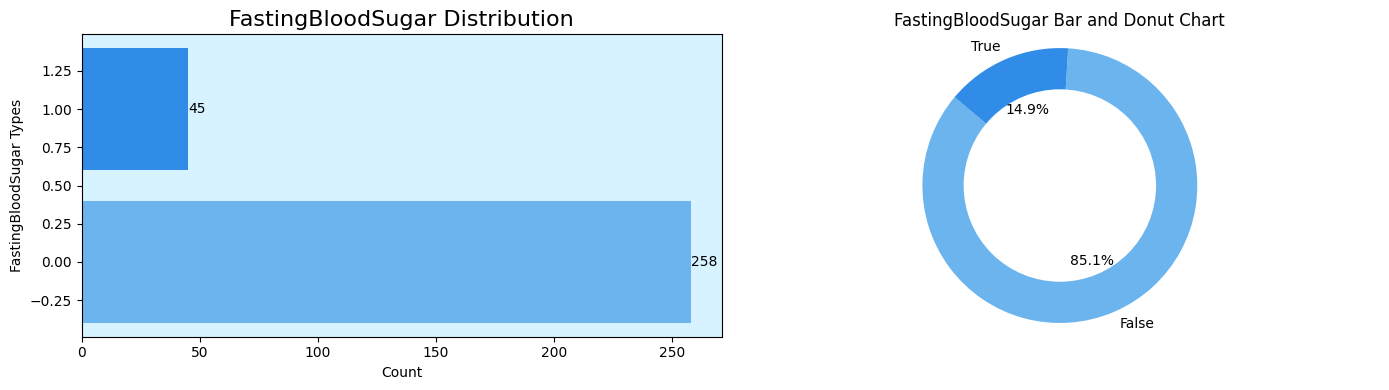

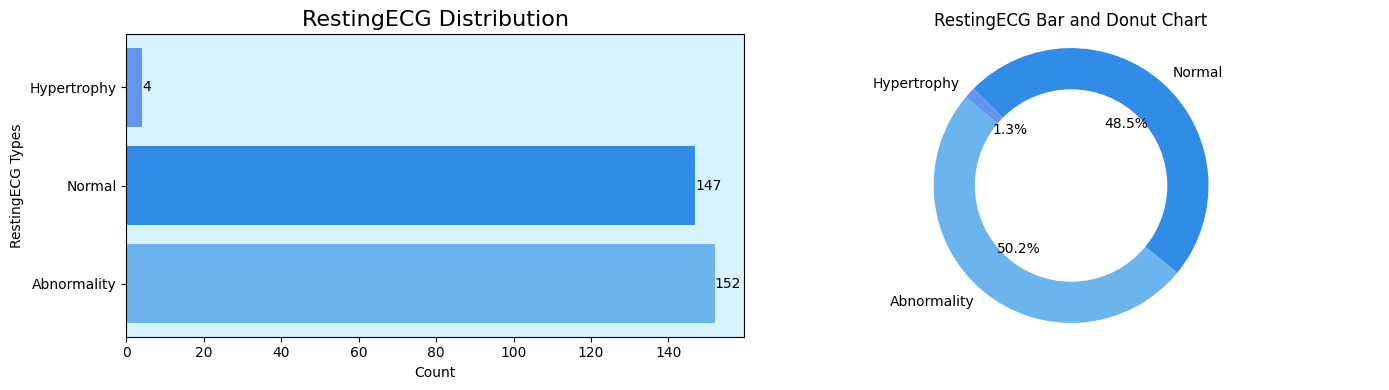

In [14]:
# Feature: FastingBloodSugar
bar_donut_chart("FastingBloodSugar")
# Feature: RestingECG
bar_donut_chart("RestingECG")

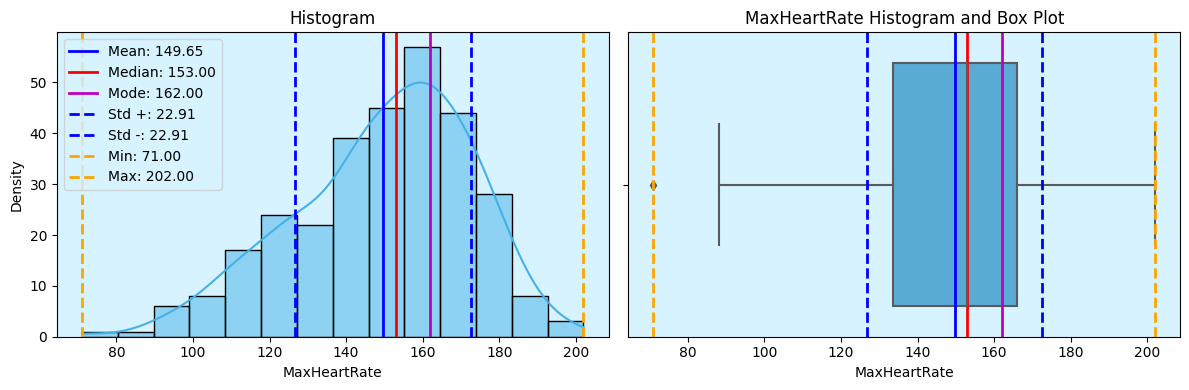

____________________________________________________________________________________________________
Skewness of the MaxHeartRate variable: -0.537
The distribution is left-skewed.
Lower Bound: 84.75
Upper Bound: 214.75
Outliers': 1


In [15]:
# Feature: MaxHeartRate
box_hist_plot("MaxHeartRate")
print("_" * 100)
skewness_dist(heart_df_eda, "MaxHeartRate")
ecg_outliers, ecg_lower_bound, ecg_upper_bound = find_outliers(heart_df_eda['MaxHeartRate'])
print("Lower Bound:", ecg_lower_bound)
print("Upper Bound:", ecg_upper_bound)
print("Outliers':", len(ecg_outliers))
outliers.update({"MaxHeartRate":len(ecg_outliers)})

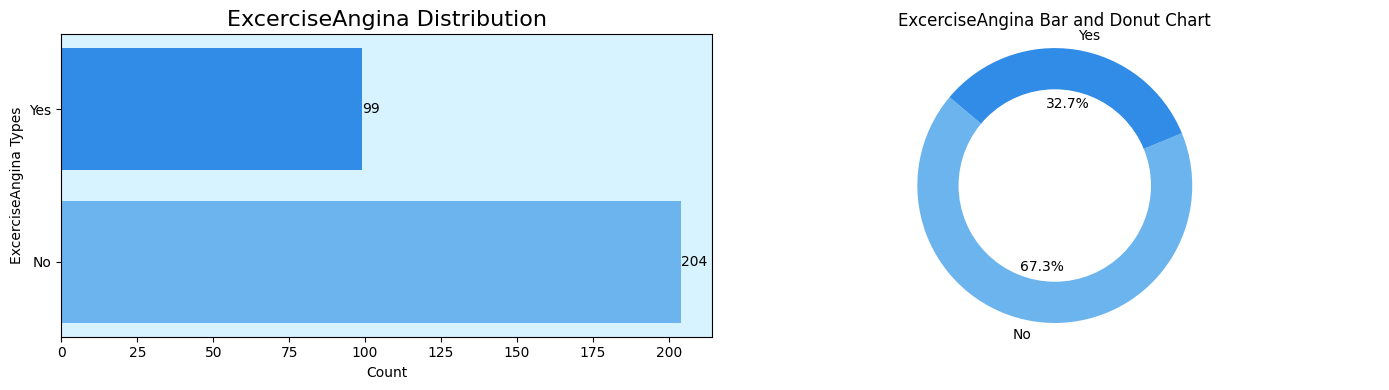

In [16]:
# Feature: ExcerciseAngina
bar_donut_chart("ExcerciseAngina")

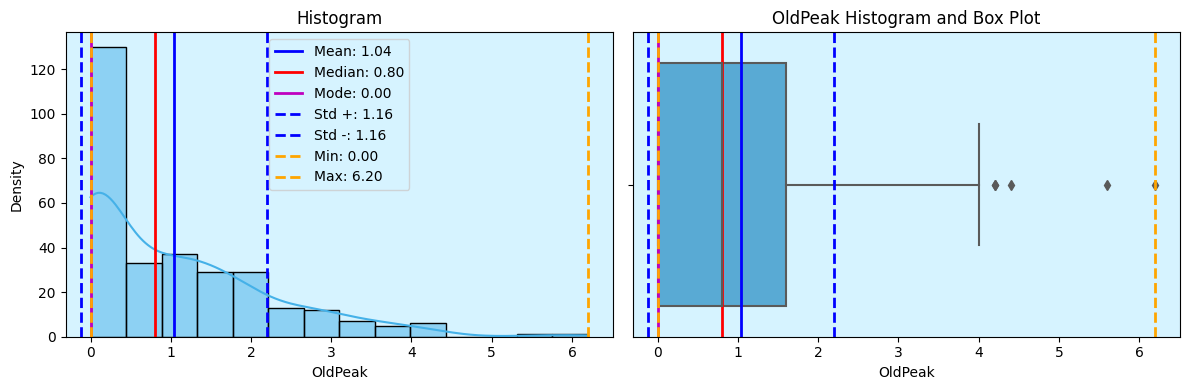

____________________________________________________________________________________________________
Skewness of the OldPeak variable: 1.270
The distribution is right-skewed.
Lower Bound: -2.4000000000000004
Upper Bound: 4.0
Outliers': 5


In [17]:
# Feature: OldPeak
box_hist_plot("OldPeak")
print("_" * 100)
skewness_dist(heart_df_eda, "OldPeak")
op_outliers, op_lower_bound, op_upper_bound = find_outliers(heart_df_eda['OldPeak'])
print("Lower Bound:", op_lower_bound)
print("Upper Bound:", op_upper_bound)
print("Outliers':", len(op_outliers))
outliers.update({"OldPeak":len(op_outliers)})

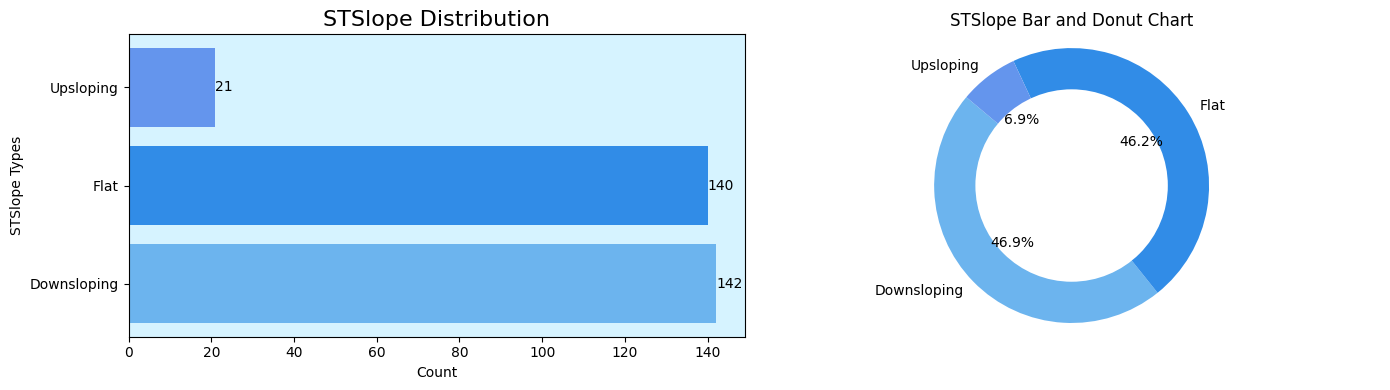

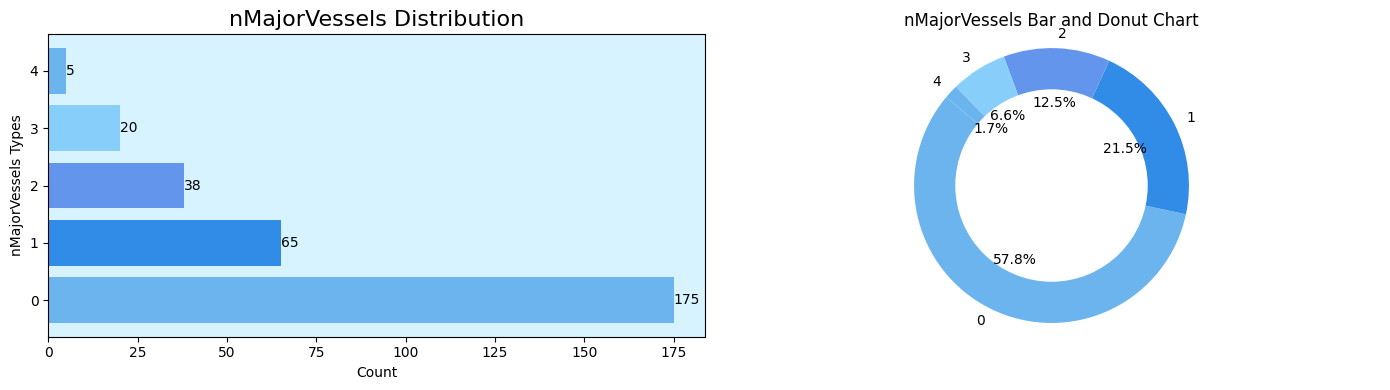

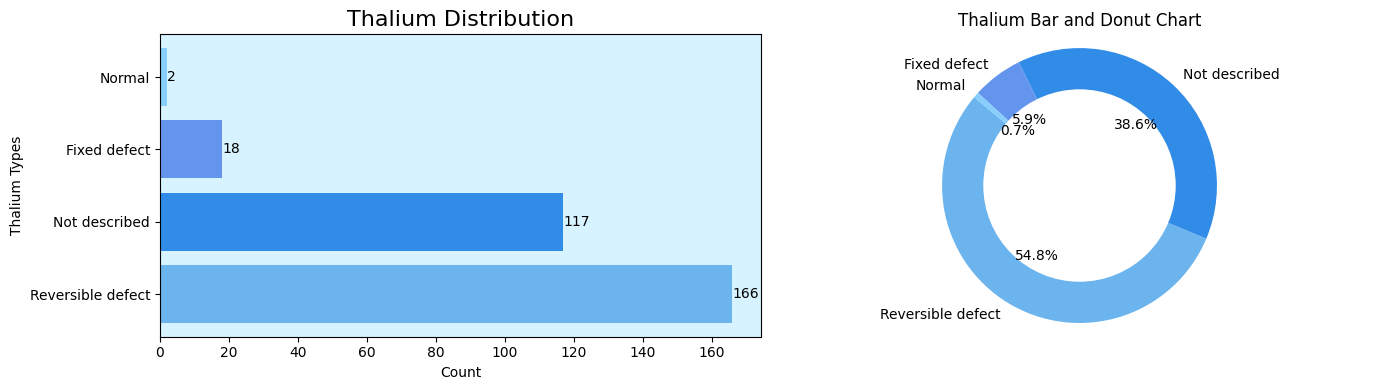

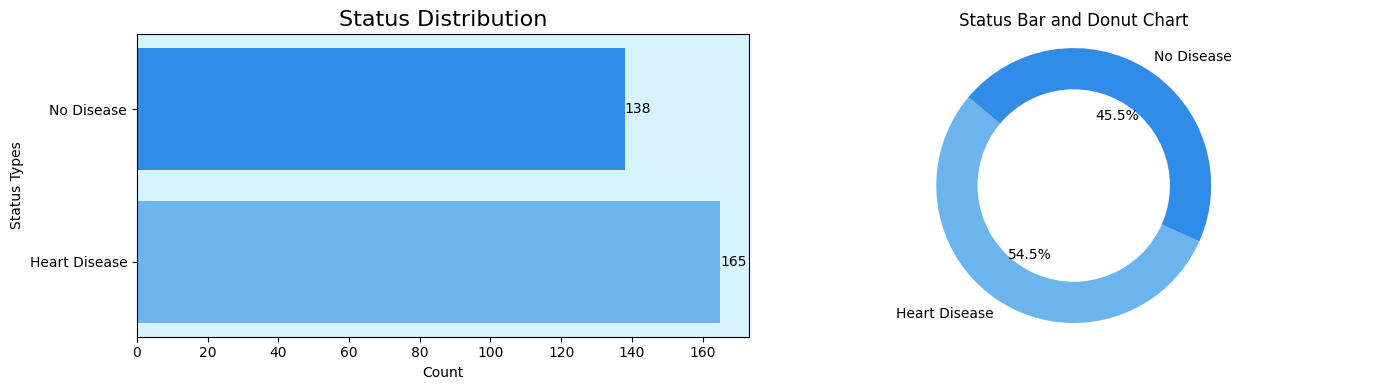

{'Age': 0, 'RestingBloodPressure': 9, 'Cholesterol': 5, 'MaxHeartRate': 1, 'OldPeak': 5}


In [18]:
# Feature: STSlope
bar_donut_chart("STSlope")
# Feature: nMajorVessels
bar_donut_chart("nMajorVessels")
# Feature: Thalium
bar_donut_chart("Thalium")
# Feature: Status
bar_donut_chart("Status")
print(outliers)

## Step 4.2 | Bivariate Analysis

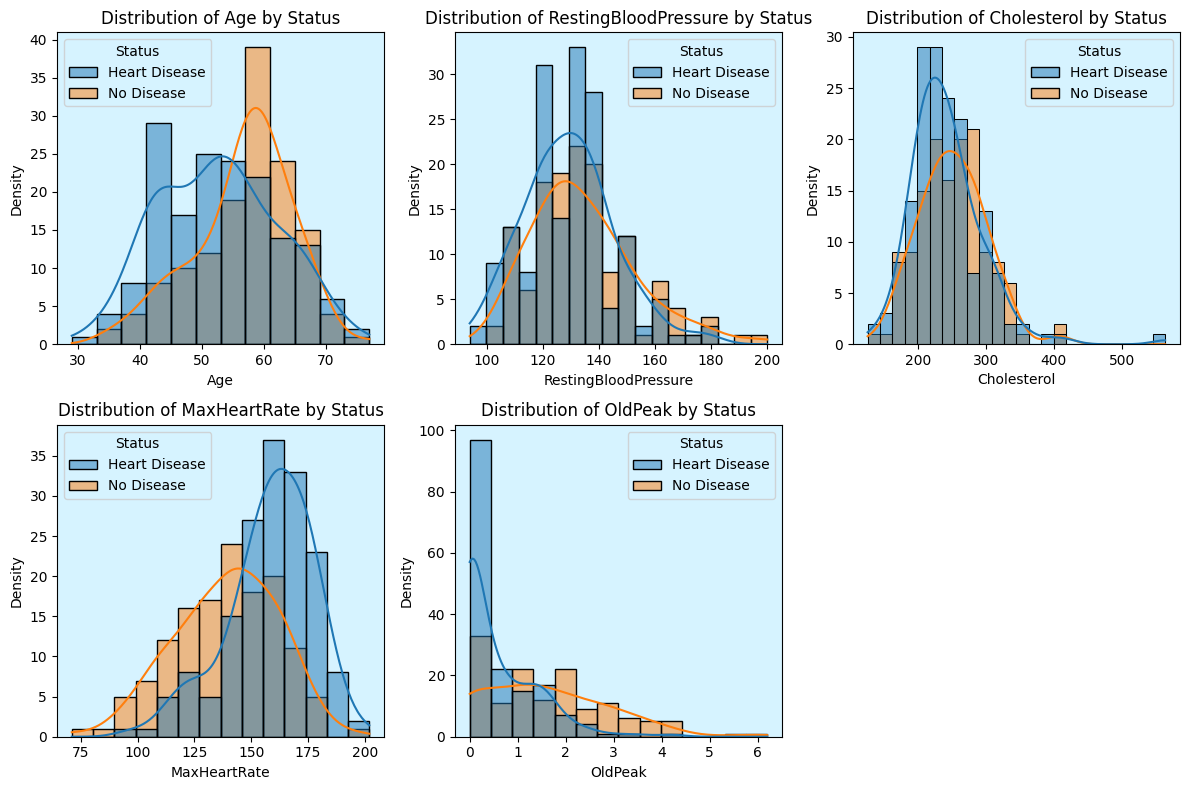

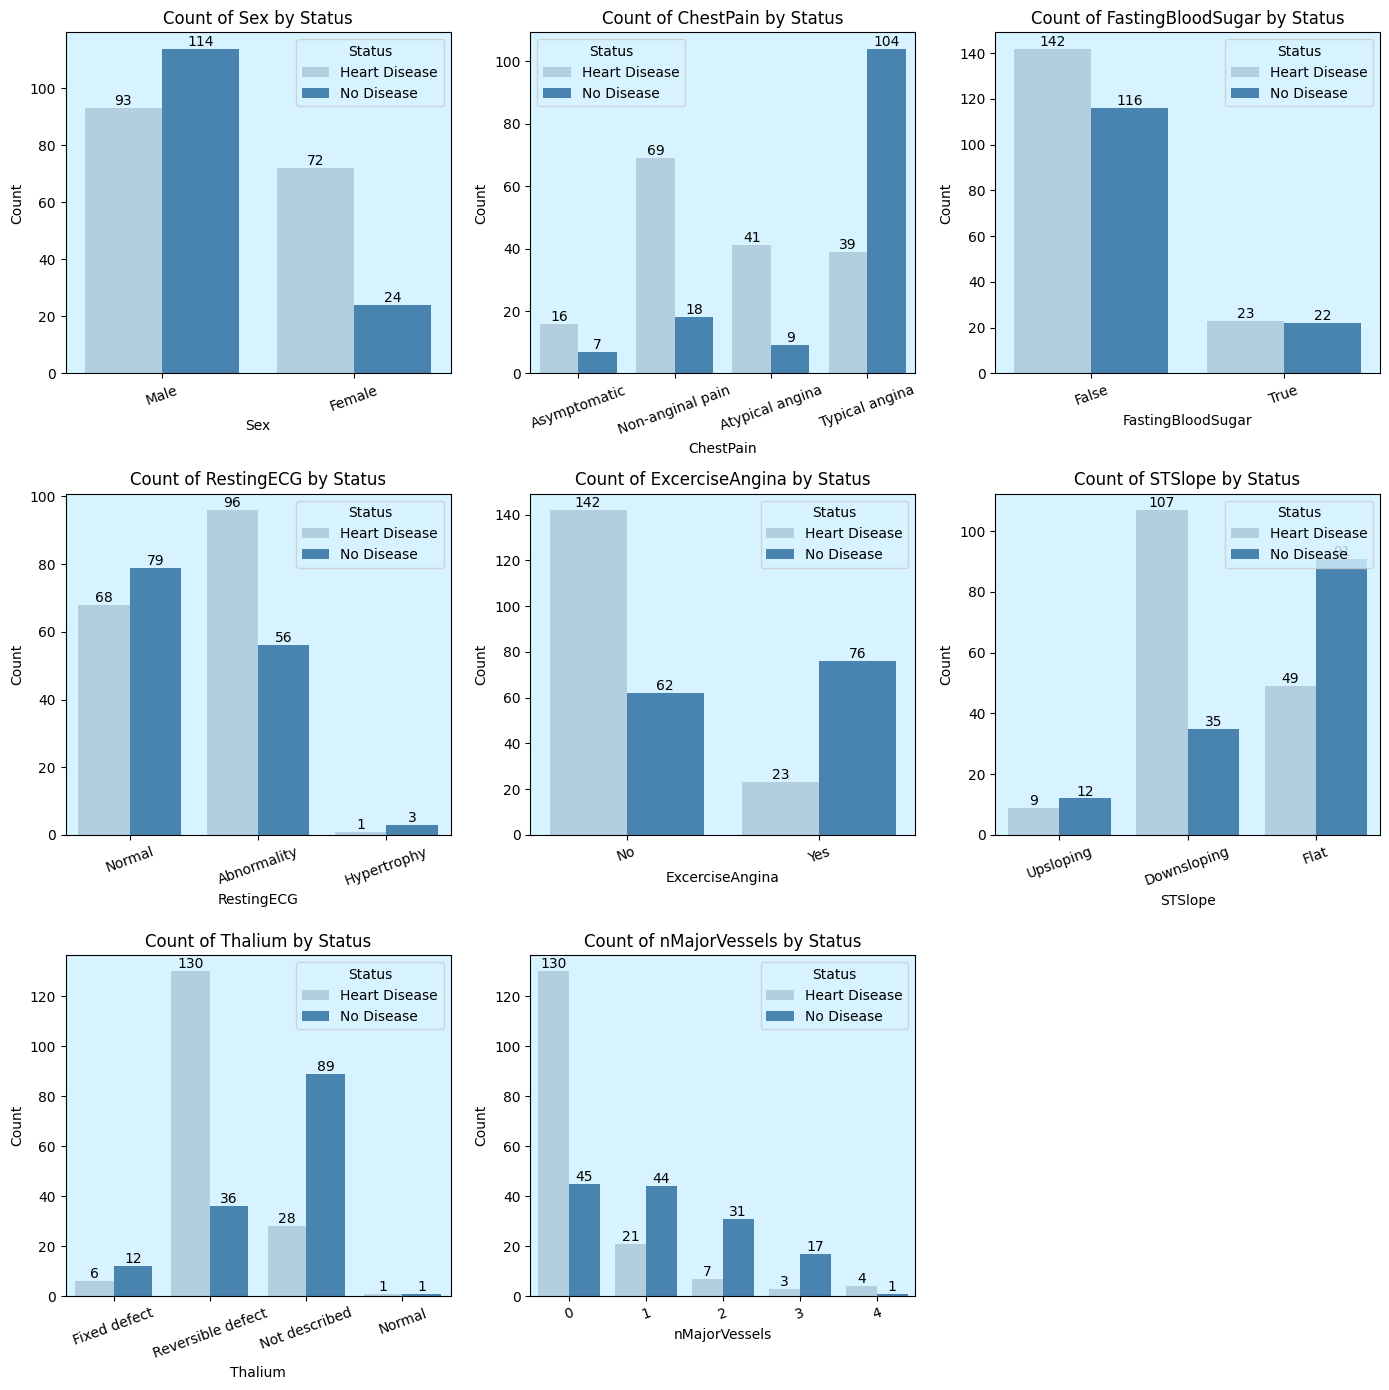

____________________________________________________________________________________________________


,Variable,Outliers
0,Age,0
1,RestingBloodPressure,9
2,Cholesterol,5
3,MaxHeartRate,1
4,OldPeak,5


In [19]:
numerical_features = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'OldPeak']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=heart_df_eda, x=feature, hue='Status', kde=True, fill=True, ax=ax)
    ax.set_title(f'Distribution of {feature} by Status')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
axes[1, 2].remove()
plt.tight_layout()
plt.savefig(f'./bivariat_numerical_feature_chart.png')
plt.show()

#Binary & Categorical Variables
categorical_features = ['Sex', 'ChestPain', 'FastingBloodSugar', 'RestingECG', 'ExcerciseAngina', 'STSlope', 'Thalium', 'nMajorVessels']
num_features = len(categorical_features)
num_rows = (num_features - 1) // 3 + 1
num_cols = min(num_features, 3)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(14, 14))
for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    sns.countplot(data=heart_df_eda, x=feature, hue='Status', ax=ax, palette='Blues')
    ax.set_title(f'Count of {feature} by Status')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=20)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points',
                    color='black')

for i in range(num_rows):
    for j in range(num_cols):
        if i * 3 + j >= num_features:
            fig.delaxes(axes[i, j])

plt.tight_layout()
plt.savefig(f'./bivariat_categorical_feature_chart.png')
plt.show()
outliers_df = pd.DataFrame(list(outliers.items()), columns=['Variable', 'Outliers'])
print("_" * 100)
outliers_df

# Step 5 | Preprocessing
## Step 5.1 | Handling Outliers

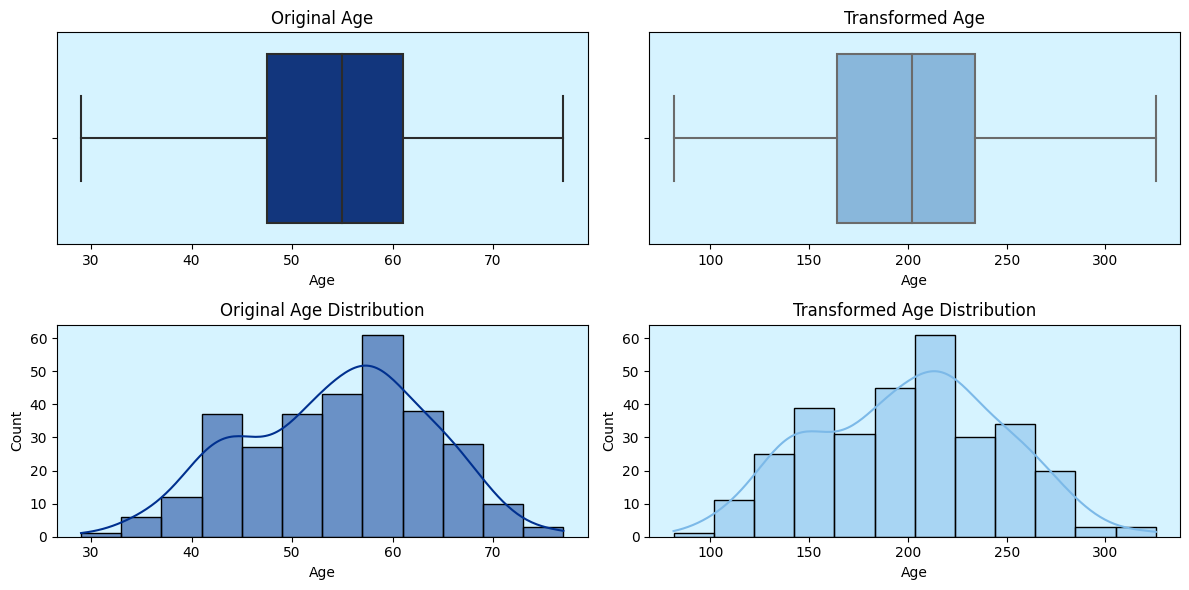

____________________________________________________________________________________________________
Skewness of the Age variable: -0.202
The distribution is left-skewed.
Skewness of the Age variable: -0.053
The distribution is left-skewed.


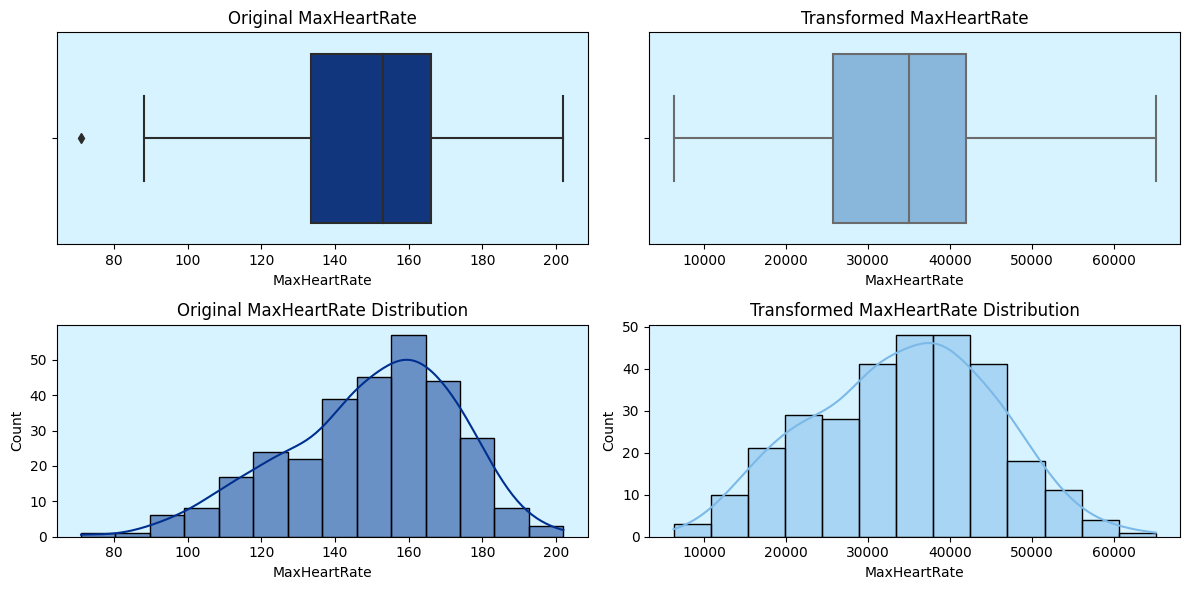

____________________________________________________________________________________________________
Skewness of the MaxHeartRate variable: -0.537
The distribution is left-skewed.
Skewness of the MaxHeartRate variable: -0.075
The distribution is left-skewed.
Lower Bound: 1449.5813549809936
Upper Bound: 66261.20104910134
Outliers: 0


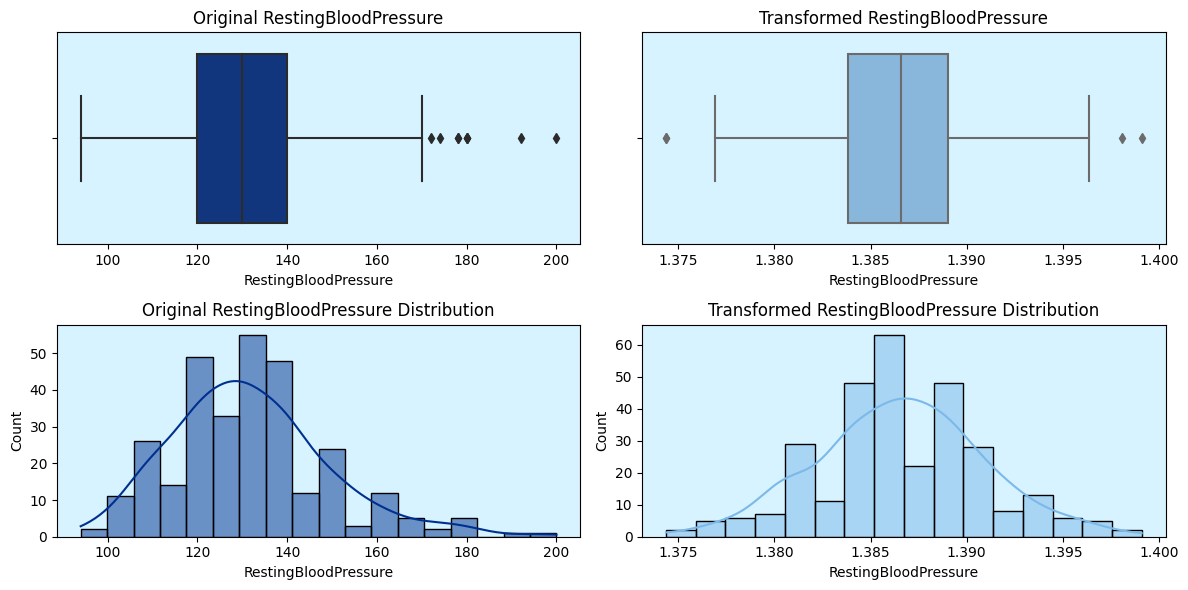

____________________________________________________________________________________________________
Skewness of the RestingBloodPressure variable: 0.714
The distribution is right-skewed.
Skewness of the RestingBloodPressure variable: -0.001
The distribution is left-skewed.
Lower Bound: 1.3760249816789325
Upper Bound: 1.3968131785209956
Outliers: 4


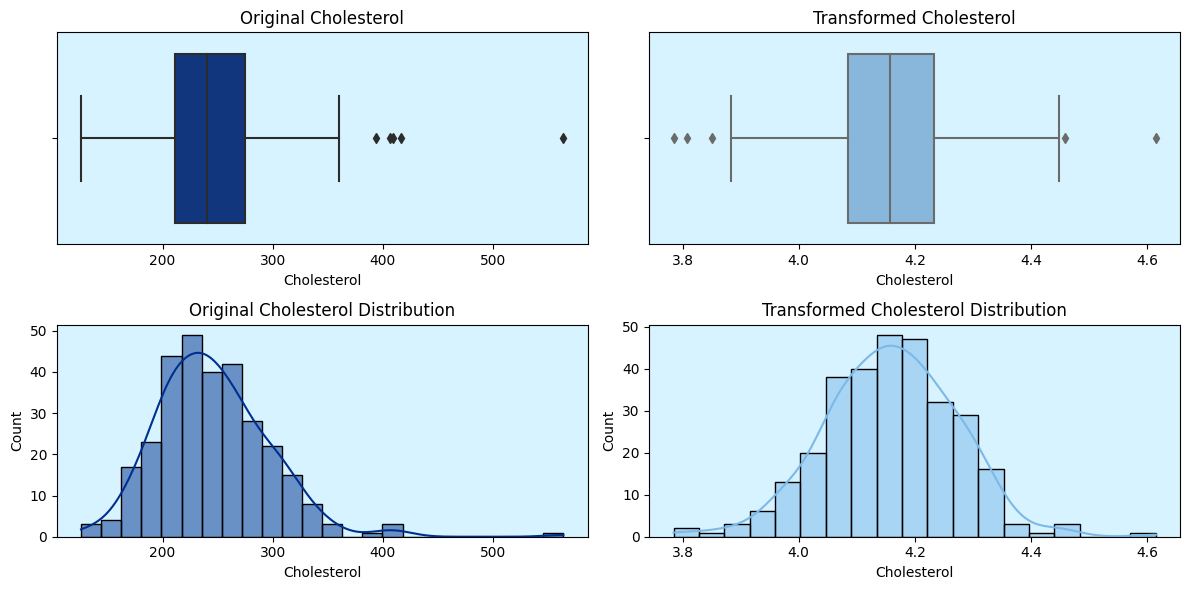

____________________________________________________________________________________________________
Skewness of the Cholesterol variable: 1.143
The distribution is right-skewed.
Skewness of the Cholesterol variable: -0.006
The distribution is left-skewed.
Lower Bound: 3.8643321163173163
Upper Bound: 4.453077861703305
Outliers: 5


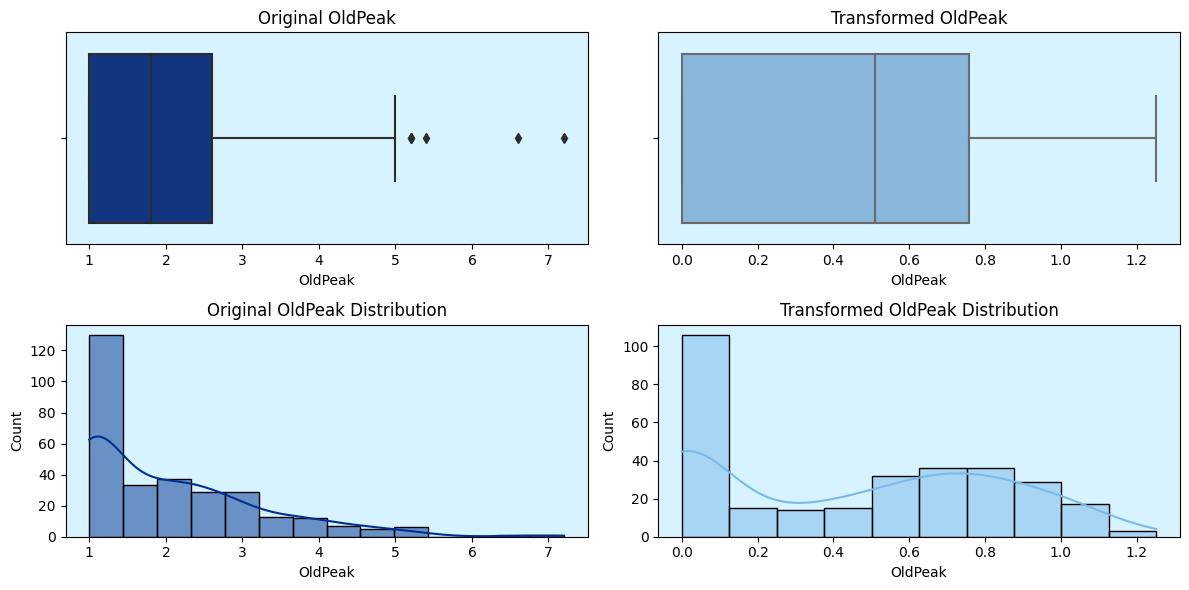

____________________________________________________________________________________________________
Skewness of the OldPeak variable: 1.270
The distribution is right-skewed.
Skewness of the OldPeak variable: 0.124
The distribution is right-skewed.
Lower Bound: -1.1382439231871215
Upper Bound: 1.897073205311869
Outliers: 0


In [20]:
def box_cox_transform(heart_df):
    transformed_df = heart_df.copy()
    features_to_transform = ["Age", "RestingBloodPressure", "Cholesterol", "MaxHeartRate", "OldPeak"]

    for feature in features_to_transform:
        if np.any(heart_df[feature] <= 0):
            min_value = abs(heart_df[feature].min()) + 1
            heart_df[feature] += min_value
        transformed_feature, lambda_value = boxcox(heart_df[feature])
        transformed_df[feature] = transformed_feature
    return transformed_df

def plot_transform(heart_df, transformed_df, variable):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

    sns.boxplot(x=heart_df[variable], ax=axes[0, 0], color='#00308F') 
    axes[0, 0].set_title(f"Original {variable}")

    sns.boxplot(x=transformed_df[variable], ax=axes[0, 1], color='#7CB9E8') 
    axes[0, 1].set_title(f"Transformed {variable}")

    sns.histplot(heart_df[variable], ax=axes[1, 0], kde=True, color='#00308F')  
    axes[1, 0].set_title(f"Original {variable} Distribution")

    sns.histplot(transformed_df[variable], ax=axes[1, 1], kde=True, color='#7CB9E8') 
    axes[1, 1].set_title(f"Transformed {variable} Distribution")

    plt.tight_layout()
    plt.savefig(f'./{variable}_after_transformed_hist_boxplot.png')
    plt.show()
transformed_df = box_cox_transform(df_copy)
# Age variable 
plot_transform(df_copy, transformed_df, 'Age')
print("_" * 100)
skewness_dist(heart_df_eda, "Age")
skewness_dist(transformed_df, "Age")
#Max Heart Rate variable
plot_transform(df_copy, transformed_df, 'MaxHeartRate')
print("_" * 100)
skewness_dist(heart_df_eda, "MaxHeartRate")
skewness_dist(transformed_df, "MaxHeartRate")
ecg_outliers_bc, ecg_lower_bound_bc, ecg_upper_bound_bc = find_outliers(transformed_df['MaxHeartRate'])
print("Lower Bound:", ecg_lower_bound_bc)
print("Upper Bound:", ecg_upper_bound_bc)
print("Outliers:", len(ecg_outliers_bc))
#Resting Blood Pressure variable 
plot_transform(df_copy, transformed_df, 'RestingBloodPressure')
print("_" * 100)
skewness_dist(heart_df_eda, "RestingBloodPressure")
skewness_dist(transformed_df, "RestingBloodPressure")
rbp_outliers_bc, rbp_lower_bound_bc, rbp_upper_bound_bc = find_outliers(transformed_df['RestingBloodPressure'])
print("Lower Bound:", rbp_lower_bound_bc)
print("Upper Bound:", rbp_upper_bound_bc)
print("Outliers:", len(rbp_outliers_bc))
#Cholesterol variable 
plot_transform(df_copy, transformed_df, 'Cholesterol')
print("_" * 100)
skewness_dist(heart_df_eda, "Cholesterol")
skewness_dist(transformed_df, "Cholesterol")
ch_outliers_bc, ch_lower_bound_bc, ch_upper_bound_bc = find_outliers(transformed_df['Cholesterol'])
print("Lower Bound:", ch_lower_bound_bc)
print("Upper Bound:", ch_upper_bound_bc)
print("Outliers:", len(ch_outliers_bc))
# Old Peak variable 
plot_transform(df_copy, transformed_df, 'OldPeak')
print("_" * 100)
skewness_dist(heart_df_eda, "OldPeak")
skewness_dist(transformed_df, "OldPeak")
op_outliers_bc, op_lower_bound_bc, op_upper_bound_bc = find_outliers(transformed_df['OldPeak'])
print("Lower Bound:", op_lower_bound_bc)
print("Upper Bound:", op_upper_bound_bc)
print("Outliers:", len(op_outliers_bc))
transformed = transformed_df.copy()

## Step 5.2 | Missing Values

In [21]:
print("_" * 100)
print("Missing Values")
print(df.isnull().sum())

____________________________________________________________________________________________________
Missing Values
Age                     0
Sex                     0
ChestPain               0
RestingBloodPressure    0
Cholesterol             0
FastingBloodSugar       0
RestingECG              0
MaxHeartRate            0
ExcerciseAngina         0
OldPeak                 0
STSlope                 0
nMajorVessels           0
Thalium                 0
Status                  0
dtype: int64


## Step 5.3 | Duplicated Values

In [22]:
duplicated_rows = df.duplicated()
print("_" * 100)
print(df[duplicated_rows])
print("_" * 100)
print(transformed[duplicated_rows])
df.drop(index=164, axis=0, inplace=True)
transformed.drop(index=164, axis=0, inplace=True)

____________________________________________________________________________________________________
     Age  Sex  ChestPain  RestingBloodPressure  Cholesterol  \
164   38    1          2                   138          175   

     FastingBloodSugar  RestingECG  MaxHeartRate  ExcerciseAngina  OldPeak  \
164                  0           1           173                0      0.0   

     STSlope  nMajorVessels  Thalium  Status  
164        2              4        2       1  
____________________________________________________________________________________________________
            Age   Sex         ChestPain  RestingBloodPressure  Cholesterol  \
164  119.658161  Male  Non-anginal pain              1.388556     3.977931   

    FastingBloodSugar   RestingECG  MaxHeartRate ExcerciseAngina  OldPeak  \
164             False  Abnormality  46024.013642              No      0.0   

         STSlope  nMajorVessels            Thalium         Status  
164  Downsloping              4  Reversi

# Step 6 | Feature Scaling

In [23]:
X = df.drop(["Status"], axis=1)  
y = df["Status"] 
col = list(df.columns.drop("Status"))
sc = StandardScaler()
X[col] = sc.fit_transform(X[col])
X.head()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium
0,0.949794,0.682656,1.976470,0.764066,-0.261285,2.389793,-1.002541,0.018826,-0.698344,1.084022,-2.271182,-0.714911,-2.147955
1,-1.928548,0.682656,1.005911,-0.091401,0.067741,-0.418446,0.901657,1.636979,-0.698344,2.118926,-2.271182,-0.714911,-0.513994
2,-1.485726,-1.464866,0.035352,-0.091401,-0.822564,-0.418446,-1.002541,0.980971,-0.698344,0.307844,0.979514,-0.714911,-0.513994
3,0.174856,0.682656,0.035352,-0.661712,-0.203222,-0.418446,0.901657,1.243374,-0.698344,-0.209608,0.979514,-0.714911,-0.513994
4,0.285561,-1.464866,-0.935208,-0.661712,2.080602,-0.418446,0.901657,0.587366,1.431958,-0.382092,0.979514,-0.714911,-0.513994


In [24]:
#Splitting the data into the training and testing set  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42, shuffle= True)
print("_" * 100)
print("Shape of Train sets:", X_train.shape)
print("Shape of Test sets:", X_test.shape)
print("Shape of Train set Labels", y_train.shape)
print("Shape of Test set Labels",y_test.shape)
print("_" * 100)
print("Train Label:\n",pd.DataFrame(y_train).value_counts())
print("_" * 100)
print("Test Label:\n",pd.DataFrame(y_test).value_counts())

____________________________________________________________________________________________________
Shape of Train sets: (241, 13)
Shape of Test sets: (61, 13)
Shape of Train set Labels (241,)
Shape of Test set Labels (61,)
____________________________________________________________________________________________________
Train Label:
 Status
1         132
0         109
Name: count, dtype: int64
____________________________________________________________________________________________________
Test Label:
 Status
1         32
0         29
Name: count, dtype: int64


# Step 7 | Modeling

In [25]:
clf_knn=KNeighborsClassifier()
parametrs_knn={'n_neighbors':[3,5,7, 9, 11], 'metric':['euclidean','manhattan','chebyshev'], 'weights': ['uniform', 'distance']}
grid_clf_knn=GridSearchCV(clf_knn, parametrs_knn, cv=5, n_jobs=-1)
grid_clf_knn.fit(X_train, y_train)
# Conditional check to confirm model training and best estimator selection
if grid_clf_knn.best_estimator_:
    # Save the trained model to a file
    with open('heart_diagnosis_disease_model.pkl', 'wb') as f:
        pickle.dump(grid_clf_knn.best_estimator_, f)
    print("Model saved successfully.")
    best_model_knn=grid_clf_knn.best_estimator_
    y_pred_knn=best_model_knn.predict(X_test)
else:
    print("Model training was not successful; no model to save.")  

ac_knn = accuracy_score(y_test, y_pred_knn)
cr_knn = classification_report(y_test, y_pred_knn)
print("Accuracy score for model " f'{best_model_knn} : ',ac_knn)
print("-" * 100)
print("classification_report for model " f'{best_model_knn} : \n',cr_knn)
# Cross-validation scores for model generalization check

cv_scores = cross_val_score(best_model_knn, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", cv_scores.mean())
cm_rnf = confusion_matrix(y_test, y_pred_knn)

Model saved successfully.
Accuracy score for model KNeighborsClassifier(metric='manhattan', n_neighbors=7) :  0.8852459016393442
----------------------------------------------------------------------------------------------------
classification_report for model KNeighborsClassifier(metric='manhattan', n_neighbors=7) : 
               precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Cross-Validation Scores: [0.80327869 0.86885246 0.78333333 0.85       0.76666667]
Average Cross-Validation Score: 0.8144262295081968
